# Forecast for Monopole and Dipole

The prediction for the magnitude of the SGWB in this notebook is done with the results for $I_0$ and $I_{\beta}\equiv(1-n_I)\beta I_0$  reported in 2412.14010

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt
import matplotlib

font = {'size': 16, 'family':'Serif'}
#font = {'size': 18, 'family':'Latin Modern Roman'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

$\Delta I_0 = \sqrt{\frac{2}{3 |2n_I+1|}} \frac{4\pi\sigma^2_N}{N_{\rm star}} \left(\frac{T_{\rm obs}}{1 \,\mathrm{year}}\right)^{n_I}$

$\Delta I_{\beta} = \sqrt{\frac{2}{0.65 |2n_I+1|}} \frac{4\pi\sigma^2_N}{N_{\rm star}} \left(\frac{T_{\rm obs}}{1 \,\mathrm{year}}\right)^{n_I}$

In [31]:
year = 365*24*60*60  # seconds in a year
Tobs = 15 * year
Tcad = year / 15
fstar = 1 / year
fmin = 1 / Tobs
fmax = 1 / Tcad
print(f"fmin = {fmin:.2e}, fmax = {fmax:.2e}")
gamma = 13/3
df = 1 / Tobs
NG15_I0 = 9.1e-23

# Frequency array
nfreqs = 15
f = fmin + df*np.arange(0,nfreqs,1) #np.arange(fmin, fmax, df)
print(f"nfreqs = {len(f)}")
print(f"min freq = {f[0]:.2e}, max freq = {f[-1]:.2e}")

# noise
def noise_sq(theta_rms):
    conv_fac = 4.84814e-6 # as to radians
    theta_rms = theta_rms * conv_fac * 1e-3
    noise_sq = (theta_rms**2) * 2 * Tcad
    #print('sigma (radians)', theta_rms)
    return noise_sq

def psd(gamma, f, I0=1.):
    return I0* ((f/fstar)**(2-gamma))

def fisher_f(gamma, f):
    psd_sq = (psd(gamma, I0=1.,f=f))**2
    return psd_sq

def fisher_I0(freqs, Nstar, gamma, Tr_factor, theta_rms):
    fisher = 0.
    tr_term = (Tr_factor * Nstar**2) / (4*pi)**2 
    noise_inv = 2 * noise_sq(theta_rms)**2 # 2*sigma^4
    for f in freqs:
        fisher += fisher_f(gamma, f)
    fisher = (tr_term * Tobs / noise_inv) * fisher * df
    return fisher 

def Delta_I0(freqs, Nstar, gamma, Tr_factor, theta_rms):
    fisher = fisher_I0(freqs, Nstar, gamma, Tr_factor, theta_rms)
    delta_I0 = 1 / sqrt(fisher)
    return delta_I0

def Delta_I0_dipole(freqs, Nstar, gamma, Tr_factor, theta_rms):
    nI = 2 - gamma
    fisher = (1-nI) * beta * fisher_I0(freqs, Nstar, gamma, Tr_factor, theta_rms)
    delta_I0 = 1 / sqrt(fisher)
    return delta_I0

# convert to Omega_GW
H0 = 67.2e3 / 3.086e22  # Hubble constant in s^-1
print(f"H0 = {H0:.2e} s^-1")
def Omega_GW(I):
    return (4 * (pi**2) * (fstar**3) * I) / (3 * H0**2) 

def Delta_Omega_GW(Nstar, gamma, Tr_factor, theta_rms):
    delta_I0 = Delta_I0(f, Nstar, gamma, Tr_factor, theta_rms)
    delta_Omega_GW = Omega_GW(delta_I0)
    return delta_Omega_GW

def Delta_Omega_GW_dipole(Nstar, gamma, Tr_factor, theta_rms):
    #nI = 2 - gamma
    delta_I0_dipole = Delta_I0_dipole(f, Nstar, gamma, Tr_factor, theta_rms)
    delta_Omega_GW_dipole = Omega_GW(delta_I0_dipole)
    return delta_Omega_GW_dipole


fmin = 2.11e-09, fmax = 4.76e-07
nfreqs = 15
min freq = 2.11e-09, max freq = 3.17e-08
H0 = 2.18e-18 s^-1


# Monopole

Omega_GW =  8.052177705194483e-09


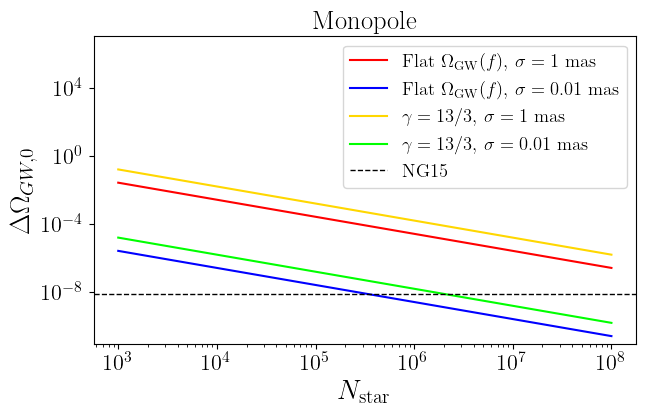

In [32]:

gamma_1 = 13/3 # equivalent to nI_2 = -7/3
gamma_2 = 5 # equivalente to nI_3 = -3 (gives flat \Omega_{GW}(f))
factor00 = 3 # proporcionality constant for the Trace[H0 H0]

theta_rms_1 = 1 # mas
theta_rms_2 = 0.01 # mas


Nstars = [1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
#Nstars = np.arange(10e3, 10e8, 1000)

def Omegas(Nstars, gamma, factor, theta_rms):    
    dOmegas = []
    for Nstar in Nstars:
        dOmega = Delta_Omega_GW(Nstar, gamma, factor, theta_rms)
        dOmegas.append(dOmega)
    return dOmegas
    
NG15_Omega_GW = Omega_GW(NG15_I0)
print('Omega_GW = ',NG15_Omega_GW)

Omegas_1 =  Omegas(Nstars, gamma_2, factor00, theta_rms_1)
Omegas_2 =  Omegas(Nstars, gamma_2, factor00, theta_rms_2)
Omegas_3 =  Omegas(Nstars, gamma_1, factor00, theta_rms_1)
Omegas_4 =  Omegas(Nstars, gamma_1, factor00, theta_rms_2)

plt.figure(figsize=(7, 4))
#plt.plot(Nstars, Omegas_1)
plt.plot(Nstars, Omegas_1, color='r', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 1$ mas')
plt.plot(Nstars, Omegas_2, color='b', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 0.01$ mas')
plt.plot(Nstars, Omegas_3, color='gold', label='$\gamma = 13/3$, $\sigma = 1$ mas')
plt.plot(Nstars, Omegas_4, color='lime', label='$\gamma = 13/3$, $\sigma = 0.01$ mas')
plt.axhline(NG15_Omega_GW, color='black', linestyle='--',linewidth=1, label='NG15')
plt.xscale('log')
plt.yscale('log')
plt.ylim(top=10e6)
plt.xlabel(r'$N_{\mathrm{star}}$',size=20)
plt.ylabel("$\Delta \Omega_{GW,0}$",size=20)
plt.title(r'Monopole')
plt.legend(loc='upper right', fontsize='small')

plt.savefig("Forecast_Monopole.pdf", bbox_inches='tight')


# Dipole

Omega_GW_dipole =  3.3013928591297385e-11


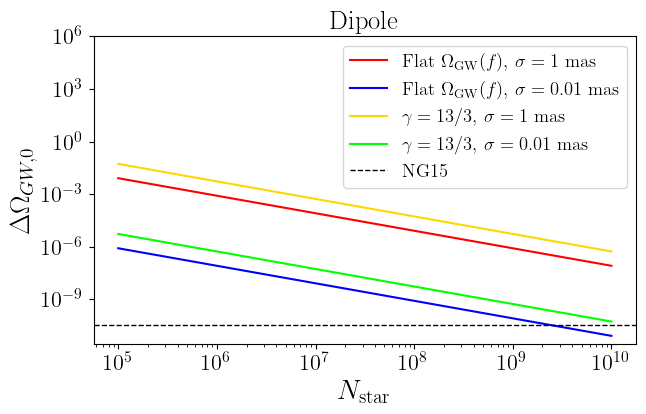

In [33]:
gamma_1 = 13/3 # equivalent to nI_2 = -7/3
gamma_2 = 5 # equivalente to nI_3 = -3 (gives flat \Omega_{GW}(f))
factor00 = 3 # proporcionality constant for the Trace[H0 H0]
factor11 = 0.65 # proporcionality constant for the Trace[H1 H1]

beta = 1.23e-3

theta_rms_1 = 1 # mas
theta_rms_2 = 0.01 # mas


Nstars = [1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
#Nstars = np.arange(10e4, 10e9, 1000)

#Delta_Omega_GW_dipole

def Omegas_dipole(Nstars, gamma, factor, theta_rms):    
    dOmegas_dipole = []
    for Nstar in Nstars:
        dOmega_dipole = Delta_Omega_GW_dipole(Nstar, gamma, factor, theta_rms)
        dOmegas_dipole.append(dOmega_dipole)
    return dOmegas_dipole

nI_NG15 = -7/3
NG15_Omega_GW_dipole = Omega_GW((beta*(1-nI_NG15)*NG15_I0))

print('Omega_GW_dipole = ', NG15_Omega_GW_dipole)

Omegas_1 =  Omegas_dipole(Nstars, gamma_2, factor11, theta_rms_1)
Omegas_2 =  Omegas_dipole(Nstars, gamma_2, factor11, theta_rms_2)
Omegas_3 =  Omegas_dipole(Nstars, gamma_1, factor11, theta_rms_1)
Omegas_4 =  Omegas_dipole(Nstars, gamma_1, factor11, theta_rms_2)

plt.figure(figsize=(7, 4))
#plt.plot(Nstars, Omegas_1)
plt.plot(Nstars, Omegas_1, color='r', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 1$ mas')
plt.plot(Nstars, Omegas_2, color='b', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 0.01$ mas')
plt.plot(Nstars, Omegas_3, color='gold', label='$\gamma = 13/3$, $\sigma = 1$ mas')
plt.plot(Nstars, Omegas_4, color='lime', label='$\gamma = 13/3$, $\sigma = 0.01$ mas')
plt.axhline(NG15_Omega_GW_dipole, color='black', linestyle='--',linewidth=1, label='NG15')
plt.xscale('log')
plt.yscale('log')
plt.ylim(top=10e5)
plt.xlabel(r'$N_{\mathrm{star}}$',size=20)
plt.ylabel("$\Delta \Omega_{GW,0}$",size=20)
plt.title(r'Dipole')
plt.legend(loc='upper right', fontsize='small')

plt.savefig("Forecast_Dipole.pdf", bbox_inches='tight')
